In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [39]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [40]:
df=df.drop(['healtcare'], axis=1)
df=df.drop(['holidayCabin'], axis=1)
df=df.drop(['gym'], axis=1)
df=df.drop(['muscleCare'], axis=1)

In [41]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [42]:
df.count()

number                    82
gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

## Palkan tutkiskelua

In [43]:
min(df['salary'])

1521

In [44]:
max(df['salary'])

6278

In [45]:
bins = [1500, 2000, 2500, 3000, 3500, 4000, 7000]

In [46]:
df['income_class'] = pd.cut(df['salary'], bins = bins)

In [47]:
df3 = pd.crosstab(df['income_class'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100

df3.loc['total'] = df3.sum()
df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
income_class,,
"(1500, 2000]",19,23.2 %
"(2000, 2500]",28,34.1 %
"(2500, 3000]",22,26.8 %
"(3000, 3500]",4,4.9 %
"(3500, 4000]",4,4.9 %
"(4000, 7000]",5,6.1 %
total,82,100.0 %


In [48]:
df['income_class'] = pd.cut(df['salary'], bins = bins)

In [49]:
df['salary'].describe().loc[['min', 'max', 'mean', '50%']]

min     1521.000000
max     6278.000000
mean    2563.878049
50%     2320.000000
Name: salary, dtype: float64

In [50]:
ax3 = sns.boxplot(x = df['salary'])

ax3.set_xlabel('Average salary, n=' + str(df['salary'].count()))

C:\Users\Gaire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 36.72222222222221, 'Average salary, n=82')

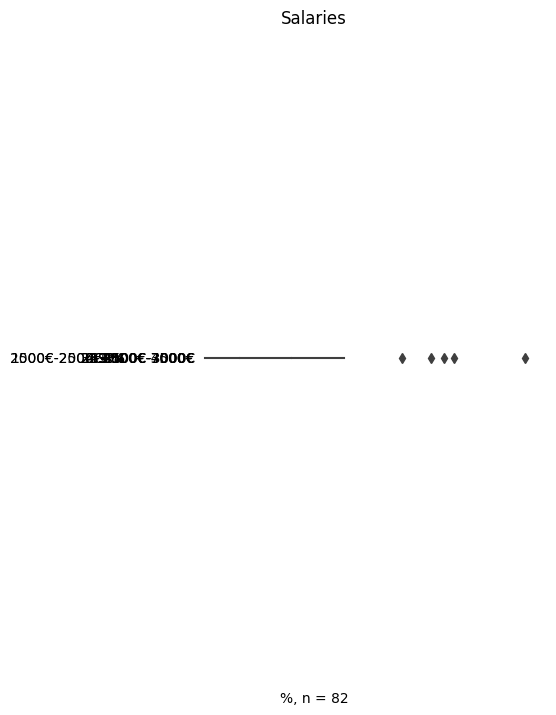

In [51]:

df6 = pd.crosstab(df['income_class'], 'Count')

 

df6.columns.name = ''

 

# Percentages

n = df6['Count'].sum()

df6['%'] = df6 / n * 100

labels = ['1500€-2000€', '2000€-2500€', '2500€-3000€', '3000€-3500€', '3500€-4000€', '4000€-7000€']

percentages = df6['%']

colors = ['blue', 'red', 'gold', 'green', 'gray', 'tan']

plt.pie(percentages, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)

plt.title('Salaries')

plt.subplots_adjust(top=1.2)

plt.axis('equal')

plt.xlabel('%, n = ' + str(df6['Count'].sum()))

plt.show()

## Siviilisäädyn tutkiskelua

In [52]:
df.value_counts(df['family'])

family
2    51
1    31
Name: count, dtype: int64

No such comm: 8c52152cb3794794a68eebae57d39fb2


family
2    51
1    31
Name: count, dtype: int64

In [53]:
df1=pd.crosstab(df['family'], 'Count')
df1

col_0,Count
family,
1,31
2,51


In [54]:
sum(df1['Count'])

82

In [55]:
df1.index=['Single','Married']
df1.columns.name=''
df1

,Count
Single,31
Married,51


<Axes: >

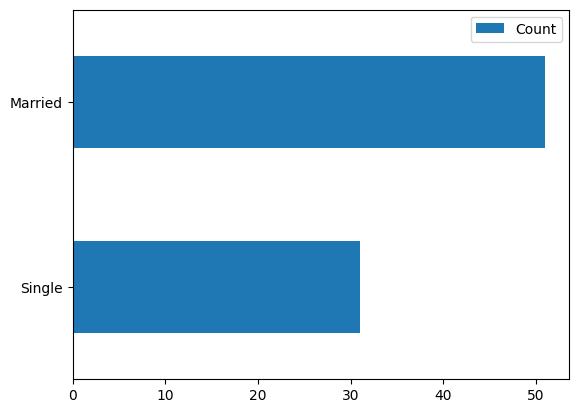

In [56]:
df1.plot.barh()

Text(0.5, 0, 'Count n=82')

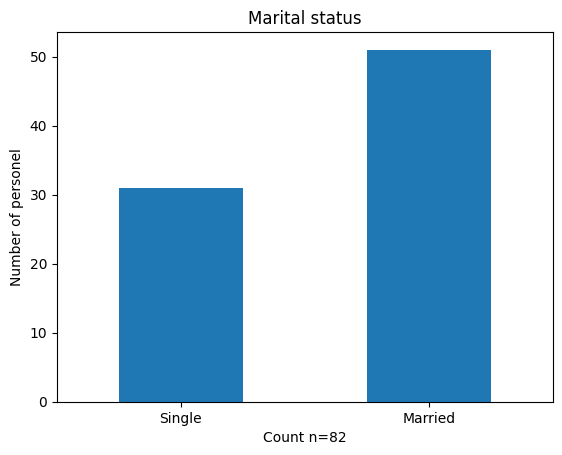

In [57]:
df1.plot.bar(legend = False)
plt.xticks(rotation=0, horizontalalignment='center')
plt.title('Marital status')
plt.ylabel('Number of personel')
plt.xlabel('Count n=82')

## Tutkitaan kahta muuttujaa, ensin tyytyväisyys työilmapiriin ja perhe

In [58]:
df4 = pd.crosstab(df['sat_workingEnvironment'], df['family'])
df4.index = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df4.columns = ['Single', 'Married']
df4

,Single,Married
Very Unhappy,5,4
Bit unhappy,4,5
Neutral,15,15
bit happy,6,17
very happy,1,10


In [59]:
df4 = pd.crosstab(df['sat_workingEnvironment'], df['family'], normalize = 'columns') * 100
df4.index = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df4.columns = ['Single', 'Married']
df4

,Single,Married
Very Unhappy,16.129032,7.843137
Bit unhappy,12.903226,9.803922
Neutral,48.387097,29.411765
bit happy,19.354839,33.333333
very happy,3.225806,19.607843


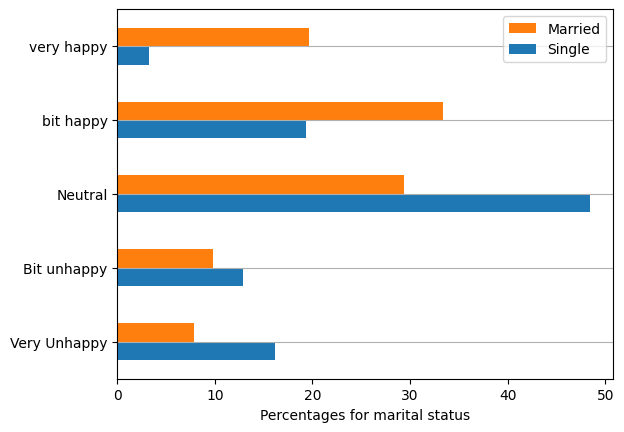

In [60]:
df4.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for marital status')

plt.grid(axis = 'y')

## Tutkitaan onko työpaikkatyytyväisyyden ja siviilisäädyn välillä riippuvuuksia

In [61]:
df5 = pd.crosstab(df['sat_workingEnvironment'], df['family'])
df5.index = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df5.columns = ['Single', 'Married']

In [62]:
from scipy.stats import chi2_contingency


chi2_contingency(df5)

Chi2ContingencyResult(statistic=8.47270716126421, pvalue=0.07571884501720708, dof=4, expected_freq=array([[ 3.40243902,  5.59756098],
       [ 3.40243902,  5.59756098],
       [11.34146341, 18.65853659],
       [ 8.69512195, 14.30487805],
       [ 4.15853659,  6.84146341]]))

## Tulkinta

Siviilisäädyn ja työpaikkatyytyväisyyden välillä ei näyttäisi olevan huomattavaa riippuvuutta, koska p-arvo on melko iso, 0.076.

## Tutkitaan riippuvuuksia palkan ja työpaikkatyytyväisyyden välillä

In [63]:
df8 = pd.crosstab(df['sat_workingEnvironment'], df['salary'])
df8.index = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df8

salary,1521,1559,1598,1638,1715,1872,1910,1949,1989,2027,...,3119,3393,3470,3510,3587,4446,4874,5069,5225,6278
Very Unhappy,0,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Bit unhappy,1,0,0,1,0,1,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0
Neutral,0,2,0,0,1,0,0,1,1,0,...,1,0,0,1,1,1,1,1,0,0
bit happy,0,0,1,0,0,1,0,1,0,2,...,0,1,0,1,1,0,0,0,0,0
very happy,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1


In [64]:
df8 = pd.crosstab(df['salary'], df['sat_workingEnvironment'])
df8.columns = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df8

,Very Unhappy,Bit unhappy,Neutral,bit happy,very happy
salary,,,,,
1521,0,1,0,0,0
1559,0,0,2,0,0
1598,1,0,0,1,0
1638,0,1,0,0,0
1715,0,0,1,0,0
1872,1,1,0,1,0
1910,0,0,0,0,1
1949,1,0,1,1,0
1989,1,3,1,0,0


Seuraavat testit saattaa vaatia ajamista kahteen kertaan, en tiedä miksei taulukot tule ekalla kertaa näkyviin. Välillä ne saattaa myös heittää erroria, mutta kun ajaa uusiksi nii toimii.

In [66]:
bins = [1500, 2000, 2500, 3000, 3500, 4000, 7000]
df8['tulot'] = pd.cut(df['salary'], bins = bins)
df8 = pd.crosstab(df8['tulot'], df['sat_workingEnvironment'])
df8.columns = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df8.columns.name = ''

df8[0:4]

,Very Unhappy,Bit unhappy,Neutral,bit happy,very happy
tulot,,,,,
"(1500, 2000]",4,6,5,3,1
"(2000, 2500]",3,1,10,10,4
"(2500, 3000]",2,1,9,7,3
"(3000, 3500]",0,1,1,1,1


In [68]:
bins = [1500, 2000, 2500, 3000, 3500, 4000, 7000]
df8['tulot'] = pd.cut(df['salary'], bins = bins)
df8 = pd.crosstab(df8['tulot'], df['sat_workingEnvironment'])
df8.columns = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']
df8.columns.name = ''

df8

,Very Unhappy,Bit unhappy,Neutral,bit happy,very happy
tulot,,,,,
"(1500, 2000]",4,6,5,3,1
"(2000, 2500]",3,1,10,10,4
"(2500, 3000]",2,1,9,7,3
"(3000, 3500]",0,1,1,1,1
"(3500, 4000]",0,0,2,2,0
"(4000, 7000]",0,0,3,0,2


## Tulkinta

In [70]:
df9 = pd.crosstab(df['sat_workingEnvironment'], df['salary'])
df9.index = ['Very Unhappy', 'Bit unhappy', 'Neutral', 'bit happy', 'very happy']

In [71]:
from scipy.stats import chi2_contingency


chi2_contingency(df9)

Chi2ContingencyResult(statistic=168.57104084321477, pvalue=0.3871240830349686, dof=164, expected_freq=array([[0.1097561 , 0.2195122 , 0.2195122 , 0.1097561 , 0.1097561 ,
        0.32926829, 0.1097561 , 0.32926829, 0.54878049, 0.32926829,
        0.2195122 , 0.32926829, 0.32926829, 0.65853659, 0.2195122 ,
        0.2195122 , 0.1097561 , 0.2195122 , 0.2195122 , 0.1097561 ,
        0.1097561 , 0.1097561 , 0.1097561 , 0.1097561 , 0.2195122 ,
        0.32926829, 0.32926829, 0.1097561 , 0.32926829, 0.32926829,
        0.32926829, 0.1097561 , 0.2195122 , 0.1097561 , 0.1097561 ,
        0.2195122 , 0.2195122 , 0.1097561 , 0.1097561 , 0.1097561 ,
        0.1097561 , 0.1097561 ],
       [0.1097561 , 0.2195122 , 0.2195122 , 0.1097561 , 0.1097561 ,
        0.32926829, 0.1097561 , 0.32926829, 0.54878049, 0.32926829,
        0.2195122 , 0.32926829, 0.32926829, 0.65853659, 0.2195122 ,
        0.2195122 , 0.1097561 , 0.2195122 , 0.2195122 , 0.1097561 ,
        0.1097561 , 0.1097561 , 0.1097561 , 0.109

Työpaikkatyytyväisyyden ja palkan välillä vaikuttaisi olevan mitätön riippuvuus.
p-arvo 0.39 kertoo, että siellä olisi pieni riippuvuus, mutta tällä data määrällä riippuvuutta ei voi varmaksi sanoa

## Kolmio testi!

In [1]:
%matplotlib widget  

import matplotlib.pyplot as plt
import random
import numpy as np

def calculate_points(n=100, n_vertices=3):

    x_points=[0]
    y_points=[0]
    
    x_vertices=[np.sin((2*k*np.pi)/n_vertices) for k in range(0,n_vertices)]
    y_vertices=[np.cos((2*k*np.pi)/n_vertices) for k in range(0,n_vertices)]
    
    for item in range(0,n):
        r=random.randint(1, n_vertices)-1
        x_points.append((x_vertices[r]+x_points[-1])/2)
        y_points.append((y_vertices[r]+y_points[-1])/2)

    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.scatter(x_points, y_points, color='k', s=.001);
    plt.show()

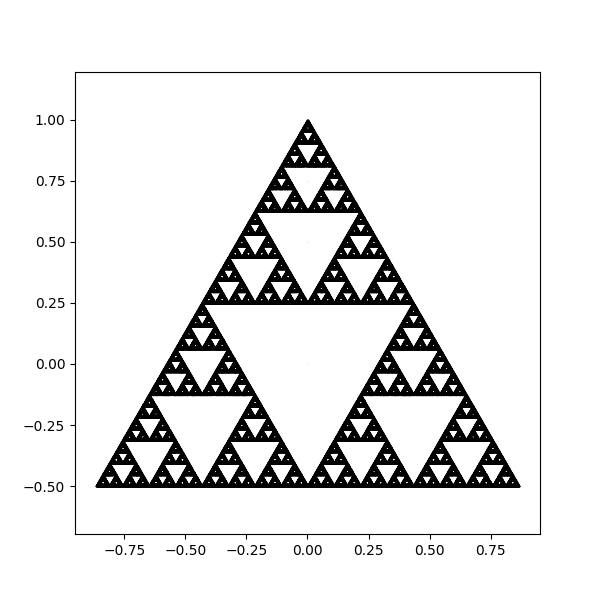

In [2]:
calculate_points(n=1000000, n_vertices=3);

## List Comprehension

List comprehension mahdollistaa listojen käsittelyn ilman for looppia.
Jos haluat listasta tiettyjä tuloksia, list comprehensionin avulla sen voi tehdä lyhyesti. Toinen tapa olisi käyttää for looppia, joka tuo lisää turhaa koodia ja täten tekee koodin lukemisesta vaikeampaa.

In [3]:
nimet = ['Jari', 'Jali', 'Timo', 'Tommi', 'Tomi', 'Iivari', 'Ilmari', 'Eeva', 'Aleksi', 'Matti', 'Minna']

In [6]:
#For loopilla
newlist = []
for x in nimet:
    if 'J' in x:
     newlist.append(x)

print(newlist)

['Jari', 'Jali']


In [7]:
#List comprehensionilla

newlist=[x for x in nimet if 'J' in x]

print(newlist)

['Jari', 'Jali']


In [10]:
#List comprehensionilla on myös helppo jättää tiettyjä elementtejä pois
# != 'Aleksi' jättää vain Aleksin pois ja printtaa muut nimet

newlist = [x for x in nimet if x != 'Aleksi']

print(newlist)

['Jari', 'Jali', 'Timo', 'Tommi', 'Tomi', 'Iivari', 'Ilmari', 'Eeva', 'Matti', 'Minna']


In [12]:
#List comprehensionilla voi myös muokkailla listassa olevia arvoja.
#Tässä tapauksessa vaihdoin kaikki nimet pienellä alkaviksi. 

newlist = [x.lower() for x in nimet]

print(newlist)

['jari', 'jali', 'timo', 'tommi', 'tomi', 'iivari', 'ilmari', 'eeva', 'aleksi', 'matti', 'minna']


In [14]:
#Iterable en tiedä tarkalleen mitä tarkoitetaan, mutta sillä voi ainakin luoda helposti numero listoja.

newlist = [x for x in range(8)]

print(newlist)

numerolista = [x for x in range(8) if x < 3]

print(numerolista)

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2]


## Keyword arguments

Kun puhutaan datan käsittelystä nii keyword argumentit auttavat eniten for loopissa olevien listojen printtaamisessa. Oletuksena kun printtaat listan nii jokainen kappale tulee omalle rivilleen. Jos for loopissa oleva listasi on pitkä niiden lukeminen hankaloituu. Mutta käyttämällä keywordia voit itse päättää miten listan kappaleet erotellaan toisistaan kun printtaat ne ulos.

Jos printtaat arvoja, voit myös päättää kuinka haluat erotella ne toisistaan käyttämällä keywordia.

Isoin apu keywordeissa on methodien argumentit. Jos sinulla on methodi joka hyväksyy argumentteja ja printtaa ne, voit methodia kutsuessa syöttää niille argumenteille arvot ja järjestyksellä ei ole väliä, toisin kuin positional argumenttejen kanssa.

In [74]:
for x in range(1, 11):
    print(x)

1
2
3
4
5
6
7
8
9
10


In [75]:
for x in range(1, 11):
    print(x, end=' ')

1 2 3 4 5 6 7 8 9 10 

In [76]:
print('John', 'James', 'Jack', 'Johnson', 'Julia', 'Jiri', 'Jyri', 'Jaakko', 'Joonas')

John James Jack Johnson Julia Jiri Jyri Jaakko Joonas


In [77]:
print('John', 'James', 'Jack', 'Johnson', 'Julia', 'Jiri', 'Jyri', 'Jaakko', 'Joonas', sep=', ')

John, James, Jack, Johnson, Julia, Jiri, Jyri, Jaakko, Joonas


In [78]:
#Positional arguments, oikea järjestys.
def hello(title, last, first):
    print('Hello', title, last, first+'!')

hello("Mr.", "Lahti", "Tommi")

Hello Mr. Lahti Tommi!


In [79]:
#Positional arguments, väärä järjestys (output on väärin)
def hello(title, last, first):
    print('Hello', title, last, first+'!')

hello("Lahti", "Tommi", "Mr")

Hello Lahti Tommi Mr!


In [80]:
#Keyword arguments, käyttäjän syöttämällä järjestyksellä ei ole väliä koska järjestys on methodissa päätetty.
def hello(title, last, first):
    print('Hello', title, last, first+'!')

hello(first="Tommi", title="Mr.", last="Lahti")

Hello Mr. Lahti Tommi!
